# Testing sliding geological variables
This notebook tries to create sliding variables giving environnemental variation for each sample along boreholes and see if these variables have a classification power to help discriminate within the marine and non-marine facies groups.

In [62]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from pandas import set_option
# set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'data/facies_vectors.csv'
training_data = pd.read_csv(filename)
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [63]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


### We group the dataset by well name

In [64]:
grouped = training_data.groupby(['Well Name'])

###  We create a set of new sliding variables representing the ratio between marine and non-marine deposits around.

In [65]:
##### Creating new variable
new_var = pd.DataFrame()

for key in grouped.groups.keys():

    NM_M = grouped.get_group(key)['NM_M'].values
    
    #We create a temporary dataframe that we reset for every well
    temp_df = pd.DataFrame()
    temp_df['Depth'] = grouped.get_group(key)['Depth']
    temp_df['Well Name'] = [key for _ in range(len(NM_M))]
    temp_df['NM_M'] = grouped.get_group(key)['NM_M']
    #We initialize a new variable
    temp_df['ratio_10m_centered'] = pd.rolling_mean(arg=temp_df['NM_M'], window=20, min_periods=1, center=True)
    temp_df['ratio_20m_centered'] = pd.rolling_mean(arg=temp_df['NM_M'], window=40, min_periods=1, center=True)
    temp_df['ratio_40m_centered'] = pd.rolling_mean(arg=temp_df['NM_M'], window=80, min_periods=1, center=True)
    temp_df['ratio_50m_centered'] = pd.rolling_mean(arg=temp_df['NM_M'], window=80, min_periods=1, center=True)
    temp_df['ratio_60m_centered'] = pd.rolling_mean(arg=temp_df['NM_M'], window=80, min_periods=1, center=True)
    # We append each well variable to a larger dataframe
    # We use a dataframe to preserve the index
    new_var = new_var.append(temp_df)

In [66]:
##### Appending new variable to dataframe
new_var = new_var.sort_index()
new_var =new_var.drop(['Well Name','Depth', 'NM_M'],axis=1)
training_data =  pd.concat([training_data,new_var],axis=1)
training_data.head(20)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,ratio_10m_centered,ratio_20m_centered,ratio_40m_centered,ratio_50m_centered,ratio_60m_centered
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,1.0,1.0,1.000000,1.000000,1.000000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,1.0,1.0,1.000000,1.000000,1.000000
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,1.0,1.0,1.000000,1.000000,1.000000
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,1.0,1.0,1.000000,1.000000,1.000000
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,1.0,1.0,1.022727,1.022727,1.022727
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894,1.0,1.0,1.044444,1.044444,1.044444
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872,1.0,1.0,1.065217,1.065217,1.065217
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830,1.0,1.0,1.085106,1.085106,1.085106
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809,1.0,1.0,1.104167,1.104167,1.104167
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787,1.0,1.0,1.122449,1.122449,1.122449


### We visualize the results

In [82]:
####### Creating dictionary of colours for the different facies
facies_colors = {1:'#F4D03F', 2:'#F5B041',3:'#DC7633',4:'#6E2C00',
       5:'#1B4F72',6:'#2E86C1', 7:'#AED6F1', 8:'#A569BD', 9:'#196F3D'}
facies_name = {1:'SS', 2:'CSiS',3:'FSiS',4:'SiSh', 5:'MS',6:'WS', 7:'D', 8:'PS', 9:'BS'}

flatui = ['#F4D03F', '#F5B041', '#DC7633', '#6E2C00',
       '#1B4F72', '#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

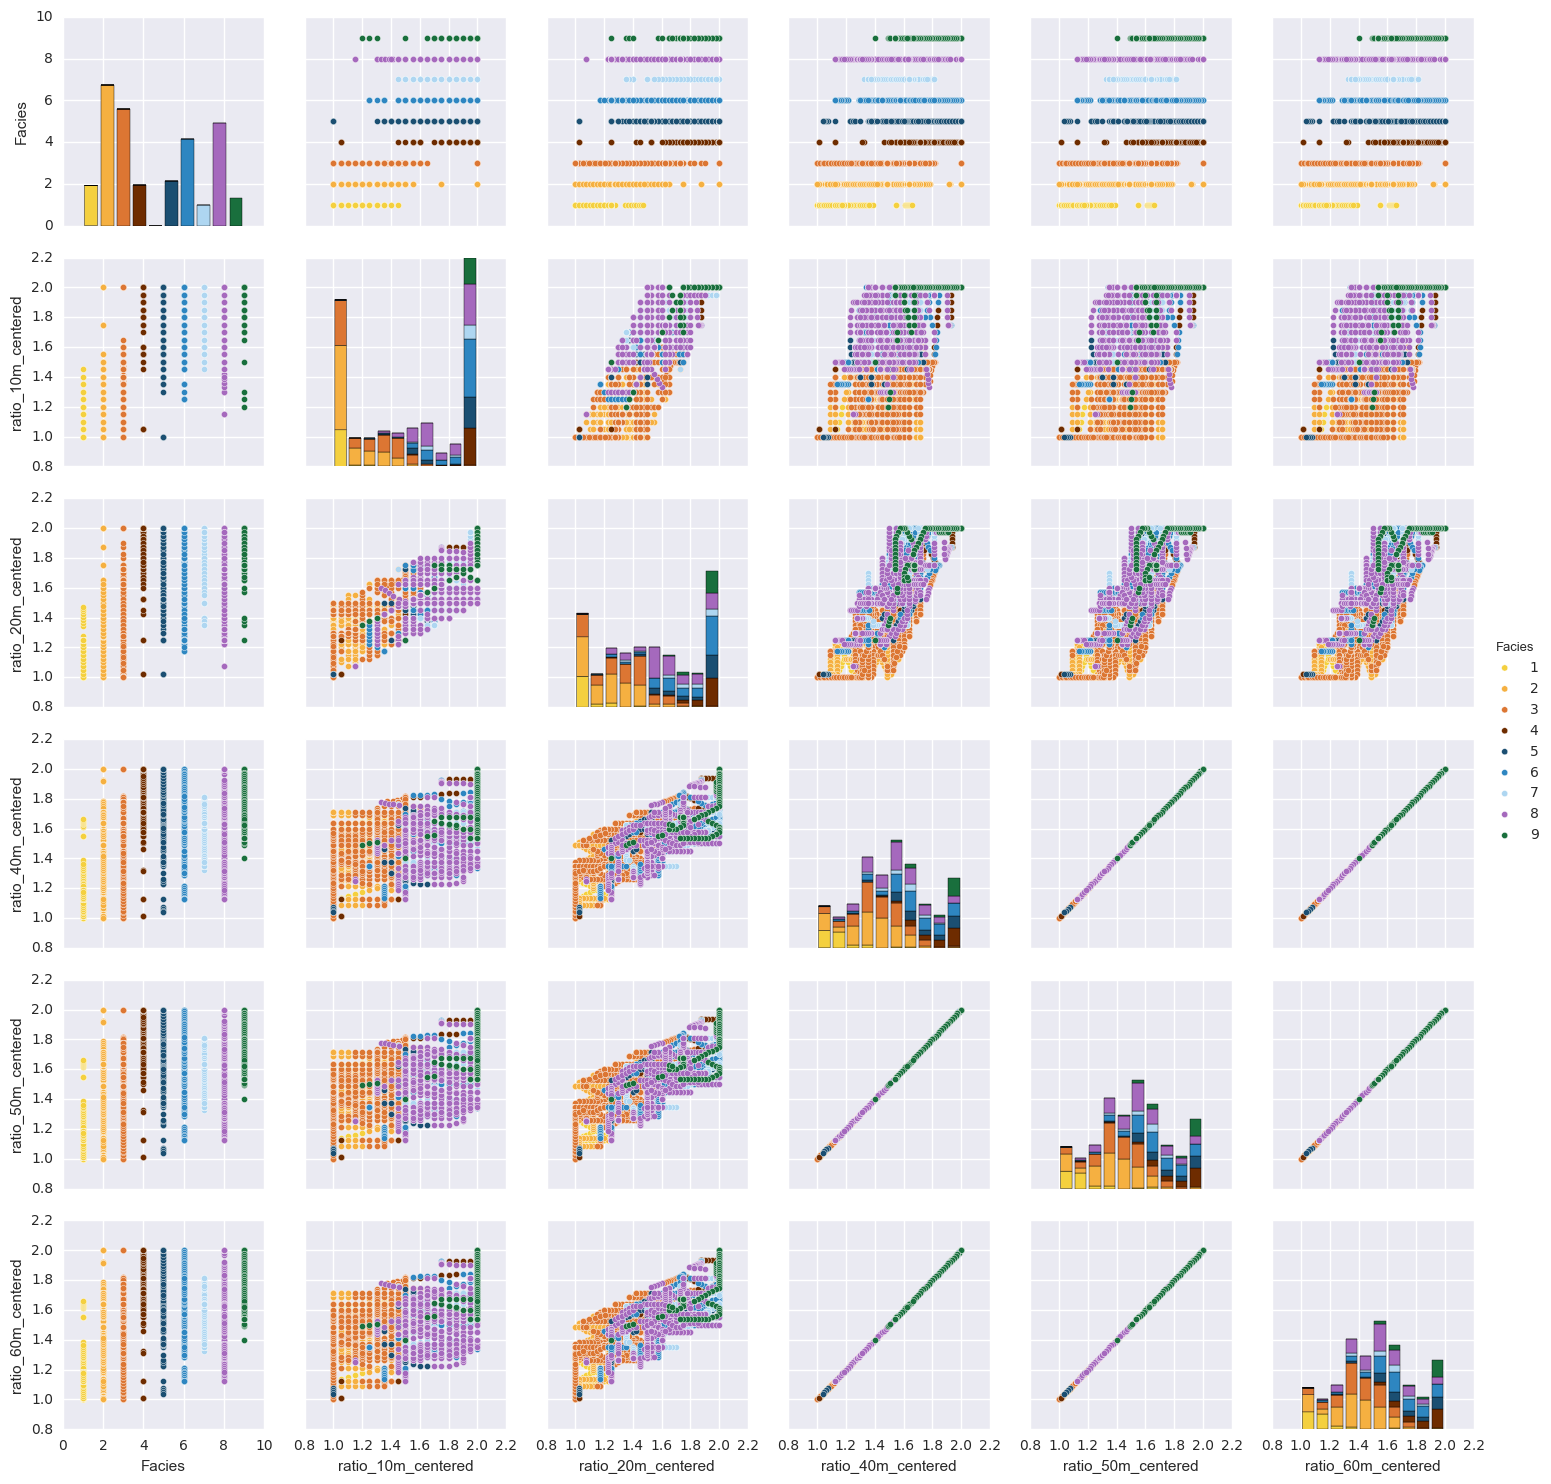

In [83]:
sns.set()
temp_df = training_data
temp_df = temp_df.drop(['Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'], axis=1)
sns.pairplot(temp_df, hue='Facies', palette = flatui)

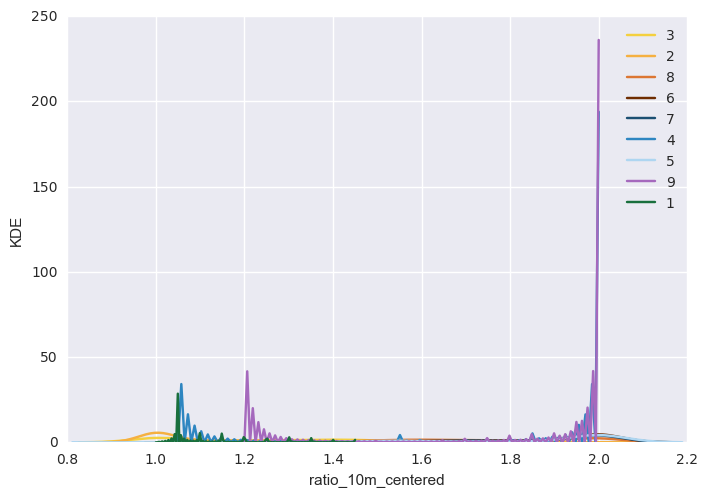

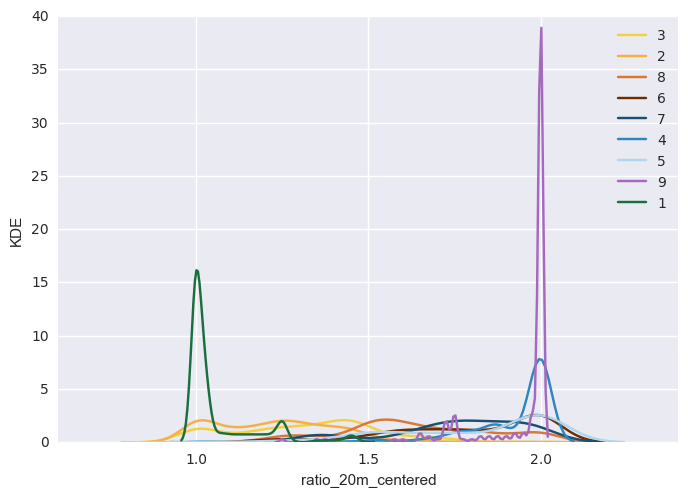

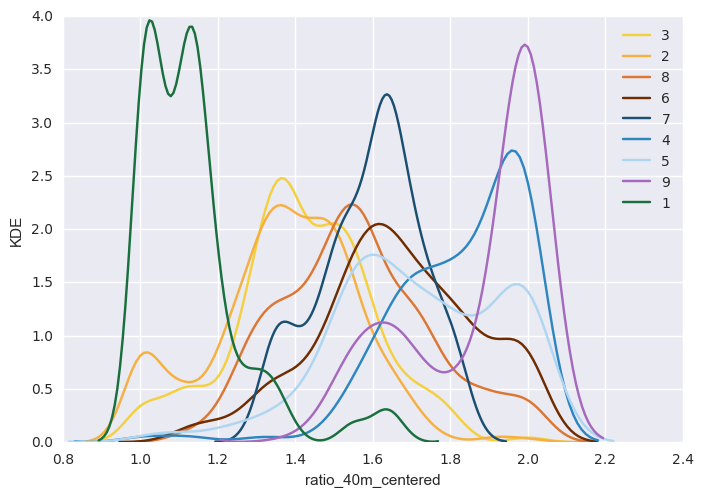

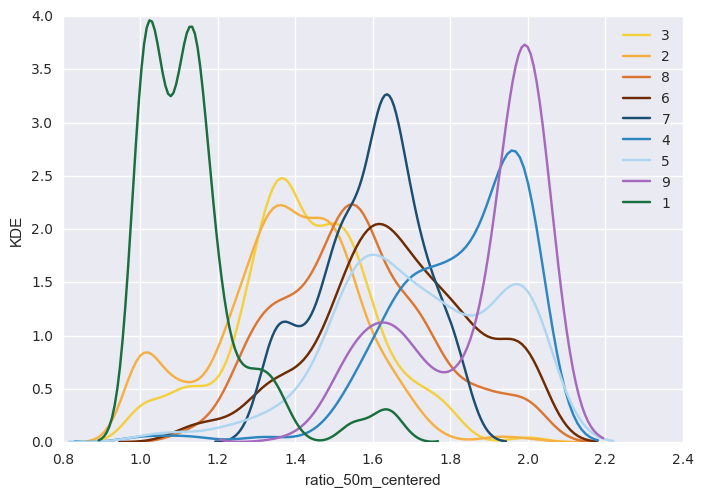

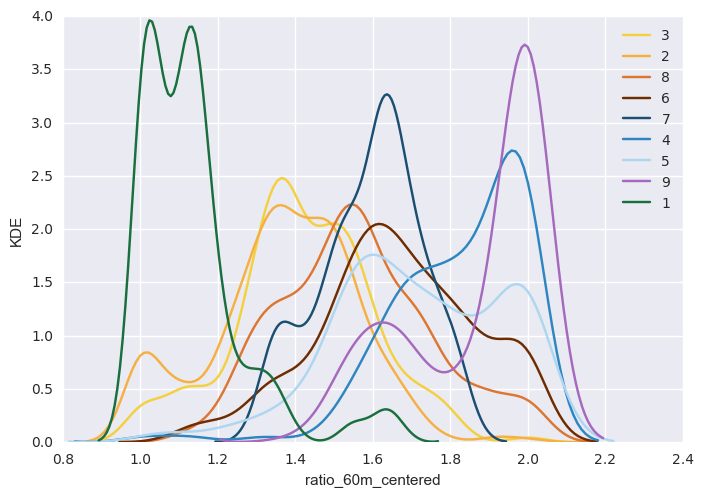

In [89]:
sns.set_palette(flatui)
list_variables = ['ratio_10m_centered', 'ratio_20m_centered', 'ratio_40m_centered', 'ratio_50m_centered',
                  'ratio_60m_centered']
for a in list_variables:
    for i in training_data['Facies'].unique():
        sns.kdeplot(training_data[a][training_data['Facies'] == i], label=i)
    plt.xlabel(a)
    plt.ylabel('KDE')
    plt.show()

The ratio_10m_centered variable is overfitted on the data. The other variables seem to have a significant discrimantion power for marine facies and less significantly for the non-marine facies.